In [1]:
# General Libs
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

2024-03-01 08:46:04.957086: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-01 08:46:05.011118: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
!pwd

/workspace


In [3]:
im_shape = (250,250)

TRAINING_DIR = r'fruits-360-original-size/Training'
TEST_DIR = r'fruits-360-original-size/Test'

seed = 10

BATCH_SIZE = 8



In [4]:
#Using keras ImageGenerator and flow_from_directoty

# Subdivision in test/validation
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [5]:
# If you want data augmentation, uncomment and run this cell
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [6]:
# Generator para parte train
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator para dataset de teste
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 4993 images belonging to 24 classes.
Found 1238 images belonging to 24 classes.
Found 3119 images belonging to 24 classes.
Classes: ['apple_6', 'apple_braeburn_1', 'apple_crimson_snow_1', 'apple_golden_1', 'apple_golden_2', 'apple_golden_3', 'apple_granny_smith_1', 'apple_hit_1', 'apple_pink_lady_1', 'apple_red_1', 'apple_red_2', 'apple_red_3', 'apple_red_delicios_1', 'apple_red_yellow_1', 'apple_rotten_1', 'cabbage_white_1', 'carrot_1', 'cucumber_1', 'cucumber_3', 'eggplant_violet_1', 'pear_1', 'pear_3', 'zucchini_1', 'zucchini_dark_1']


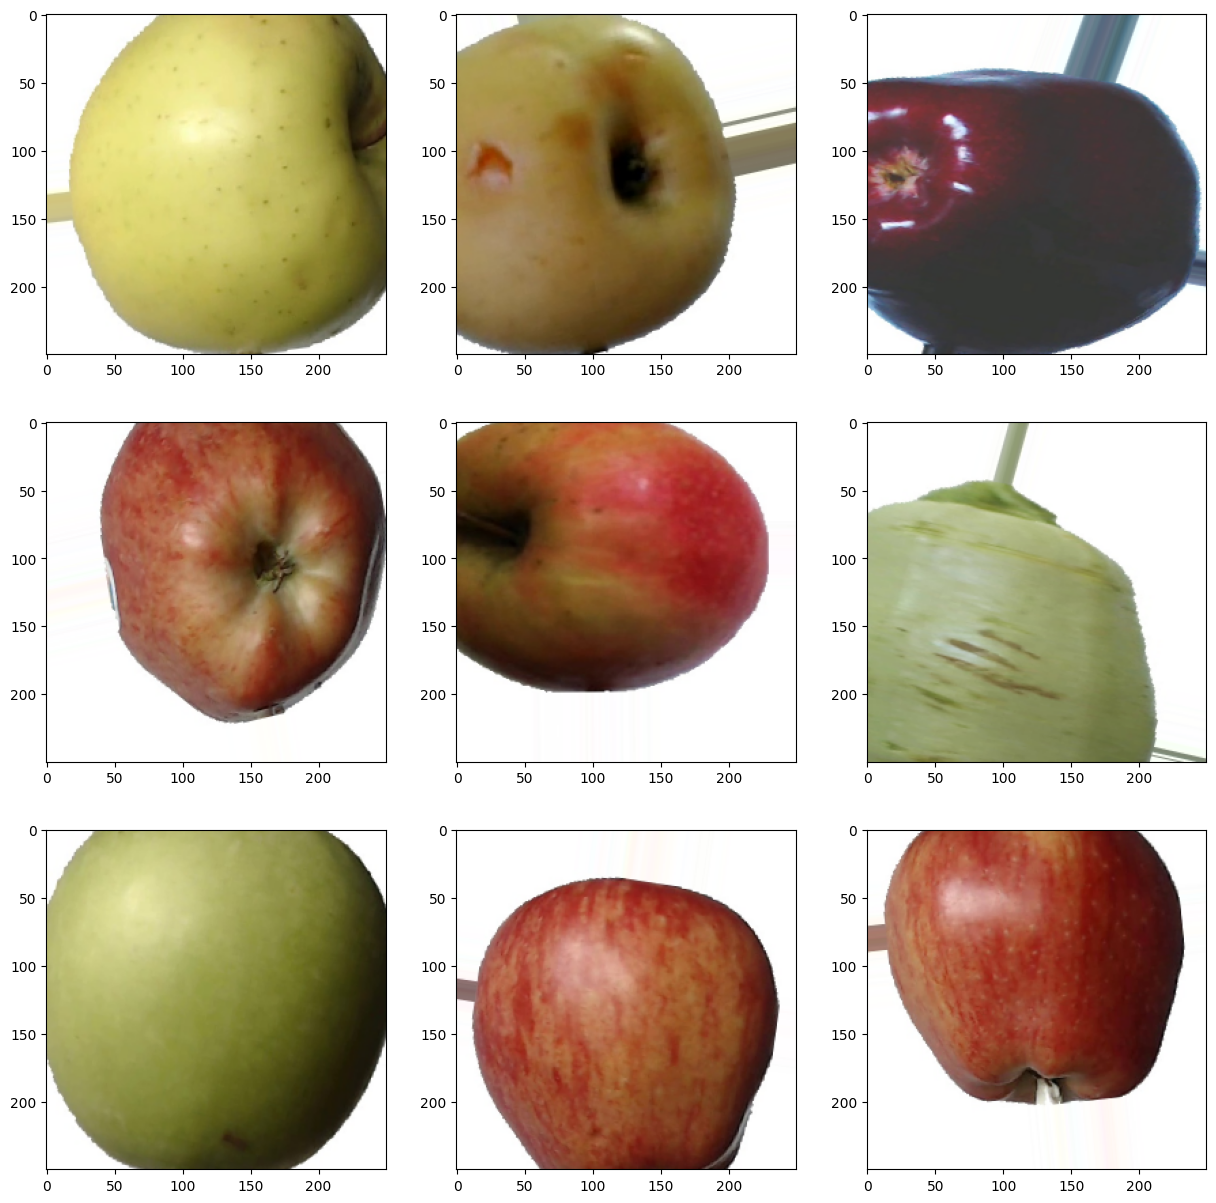

In [7]:
# Visualizing some examples
plt.figure(figsize=(15,15))
for i in range(9):
    #gera subfigures
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [8]:
#creating a simple CNN model
model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Compila o modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model = Sequential()
# model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(im_shape[0], im_shape[1], 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))
# model.summary()

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 20)      560       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 20)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 40)      7240      
                                                                 
 flatten (Flatten)           (None, 595360)            0         
                                                                 
 dense (Dense)               (None, 120)               71443320  
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                        

2024-03-01 08:46:12.613460: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1338 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:1a:00.0, compute capability: 8.6
2024-03-01 08:46:12.614449: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22043 MB memory:  -> device: 1, name: NVIDIA RTX A5000, pci bus id: 0000:28:00.0, compute capability: 8.6
2024-03-01 08:46:12.615315: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 22043 MB memory:  -> device: 2, name: NVIDIA RTX A5000, pci bus id: 0000:60:00.0, compute capability: 8.6
2024-03-01 08:46:12.616180: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 22043 MB memory:  -> device: 3, name: NVIDIA RTX A5000, pci bus id: 0000:6e:00.0, c

In [9]:
epochs = 150

#Callback to save the best model
callbacks_list = [keras.callbacks.ModelCheckpoint(filepath='cnn_from_scratch_fruits.hdf5',monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)]

#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/150


2024-03-01 08:46:14.212615: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2024-03-01 08:46:14.527586: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:625] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-03-01 08:46:14.617107: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x56056da13ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-01 08:46:14.617153: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2024-03-01 08:46:14.617164: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA RTX A5000, Compute Capability 8.6
2024-03-01 08:46:14.617174: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): NVIDIA RTX A5000, Compute Capability 8.6
2024-03-01 08:46:14.617182: I tensorflow/compiler/xla/service/

624/624 [==============================] - ETA: 0s - loss: 2.5050 - accuracy: 0.3438
Epoch 1: val_loss improved from inf to 1.13245, saving model to cnn_from_scratch_fruits.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


624/624 [==============================] - 131s 206ms/step - loss: 2.5050 - accuracy: 0.3438 - val_loss: 1.1324 - val_accuracy: 0.6063
Epoch 2/150
624/624 [==============================] - ETA: 0s - loss: 1.3581 - accuracy: 0.5529
Epoch 2: val_loss improved from 1.13245 to 1.03641, saving model to cnn_from_scratch_fruits.hdf5
624/624 [==============================] - 90s 144ms/step - loss: 1.3581 - accuracy: 0.5529 - val_loss: 1.0364 - val_accuracy: 0.6859
Epoch 3/150
624/624 [==============================] - ETA: 0s - loss: 0.9140 - accuracy: 0.6837
Epoch 3: val_loss improved from 1.03641 to 0.87115, saving model to cnn_from_scratch_fruits.hdf5
624/624 [==============================] - 88s 141ms/step - loss: 0.9140 - accuracy: 0.6837 - val_loss: 0.8711 - val_accuracy: 0.7435
Epoch 4/150
624/624 [==============================] - ETA: 0s - loss: 0.9317 - accuracy: 0.6782
Epoch 4: val_loss improved from 0.87115 to 0.76007, saving model to cnn_from_scratch_fruits.hdf5
624/624 [======

In [11]:
# Load the best saved model
from tensorflow.keras.models import load_model

model = load_model('cnn_from_scratch_fruits.hdf5')

2024-03-01 09:34:07.470520: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 272.53MiB (rounded to 285772800)requested by op StatelessRandomUniformV2
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2024-03-01 09:34:07.470604: I tensorflow/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2024-03-01 09:34:07.470646: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 48, Chunks in use: 48. 12.0KiB allocated for chunks. 12.0KiB in use in bin. 1.7KiB client-requested in use in bin.
2024-03-01 09:34:07.470676: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 3, Chunks in use: 3. 1.5KiB allocated for chunks. 1.5KiB in use in bin. 1.4KiB client-requested in use in bin.
2024-03-01 09:34:07.470704: I tensorflow/

ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[595360,120] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2] name: 

In [12]:
# Using the validation dataset
score = model.evaluate_generator(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

/tmp/ipykernel_4445/1237713776.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(validation_generator)


Val loss: 0.4075283110141754
Val accuracy: 0.921647846698761


In [13]:
# Using the test dataset
score = model.evaluate_generator(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/tmp/ipykernel_4445/4054959399.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator)


Test loss: 0.1954335868358612
Test accuracy: 0.9448541402816772


390/390 [==============================] - 13s 32ms/step


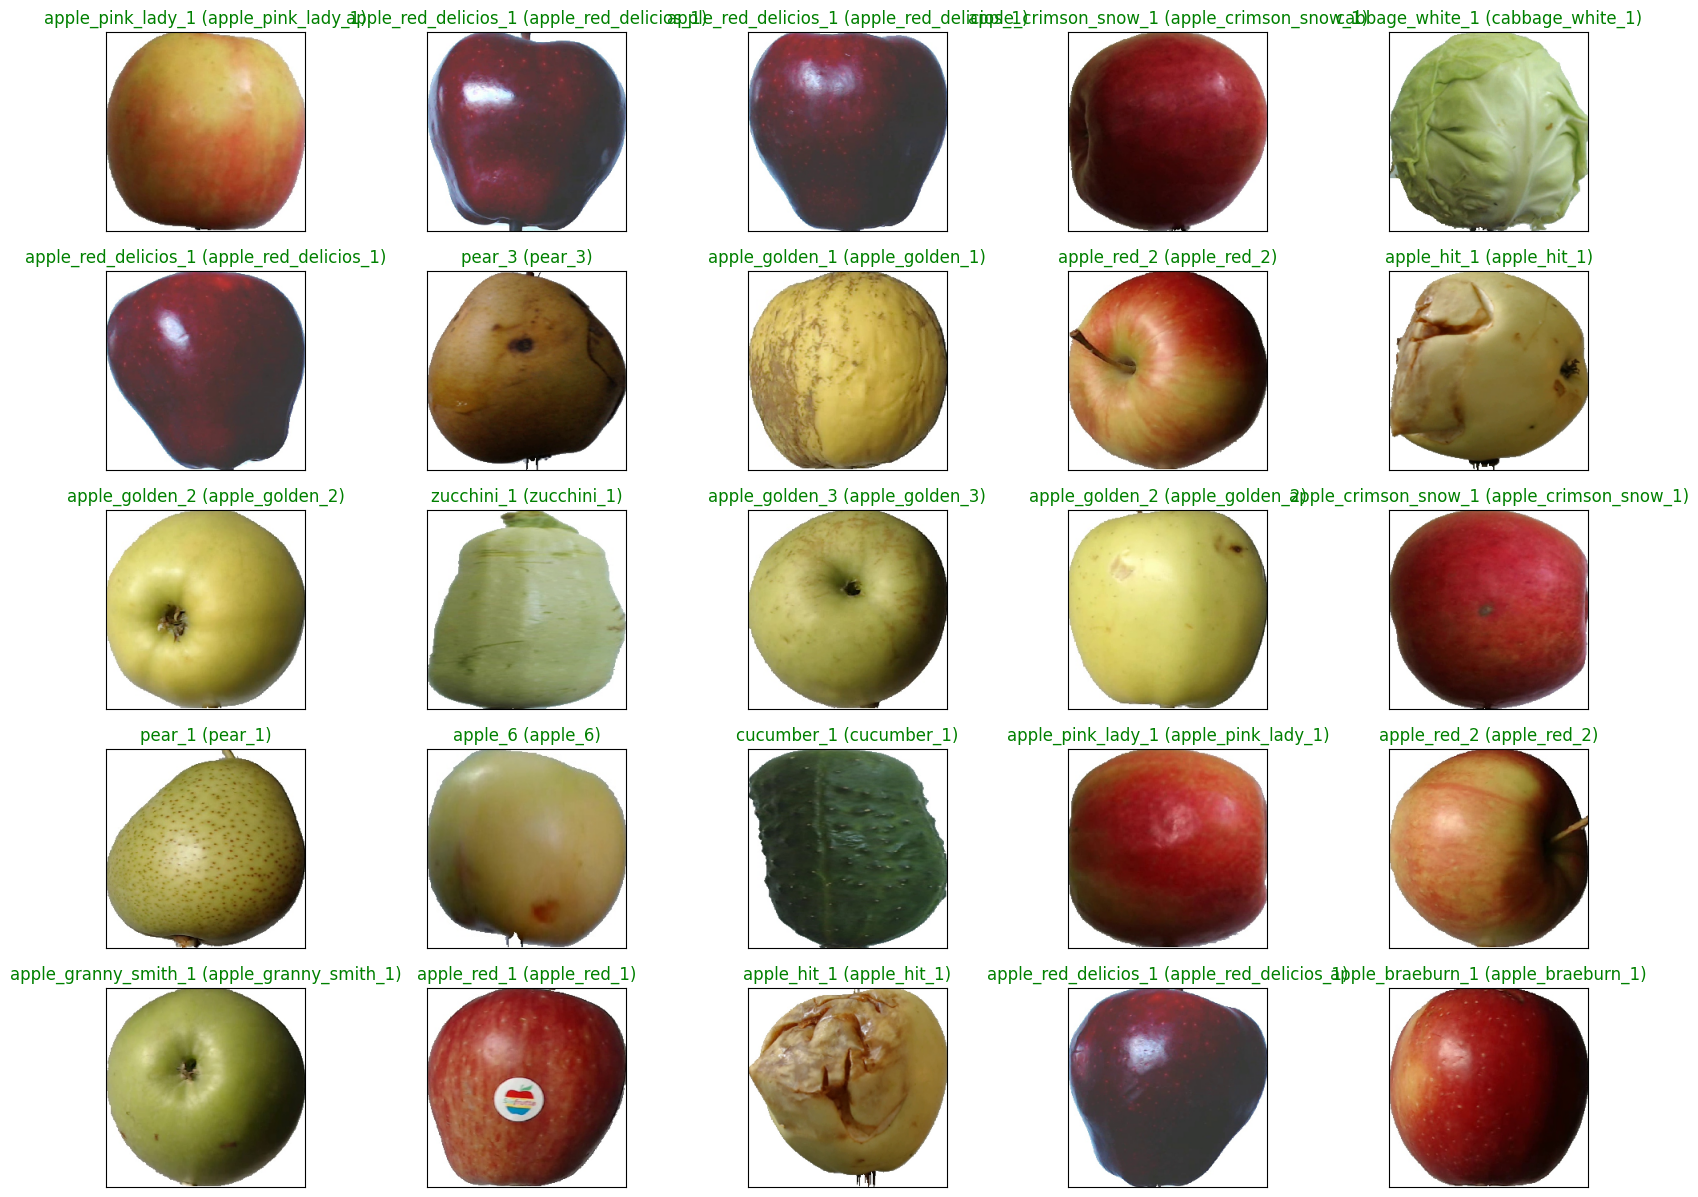

In [19]:
import numpy as np
from keras.preprocessing.image import array_to_img, img_to_array, load_img
# Let's plot the predictions of different fruits and check their original labels
Y_pred = model.predict(test_generator)
true_labels = test_generator.labels
class_labels = ['apple_6', 'apple_braeburn_1', 'apple_crimson_snow_1', 'apple_golden_1', 'apple_golden_2', 'apple_golden_3', 'apple_granny_smith_1', 'apple_hit_1', 'apple_pink_lady_1', 'apple_red_1', 'apple_red_2', 'apple_red_3', 'apple_red_delicios_1', 'apple_red_yellow_1', 'apple_rotten_1', 'cabbage_white_1', 'carrot_1', 'cucumber_1', 'cucumber_3', 'eggplant_violet_1', 'pear_1', 'pear_3', 'zucchini_1', 'zucchini_dark_1'] 
fig = plt.figure(figsize=(20, 15))

# Determine the number of test samples available
num_samples = test_generator.samples

# Choose a random subset of samples for visualization
sample_indices = np.random.choice(num_samples, size=25, replace=False)

for i, idx in enumerate(sample_indices):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    
    # Load and display the test image
    img_path = test_generator.filepaths[idx]
    img = load_img(img_path, target_size=im_shape)
    ax.imshow(img)
    
    # Get the predicted class index
    pred_idx = np.argmax(Y_pred[idx])
    
    # Get the true class index
    true_idx = true_labels[idx]
    
    # Set the title with class labels and color based on correctness
    ax.set_title("{} ({})".format(class_labels[pred_idx], class_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

plt.show()  # Display the plot